In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython import display
from tqdm import tqdm_notebook as tqdm

from keras.datasets import mnist

Using TensorFlow backend.
/home/jonathan/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
img_rows, img_cols = 28, 28
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

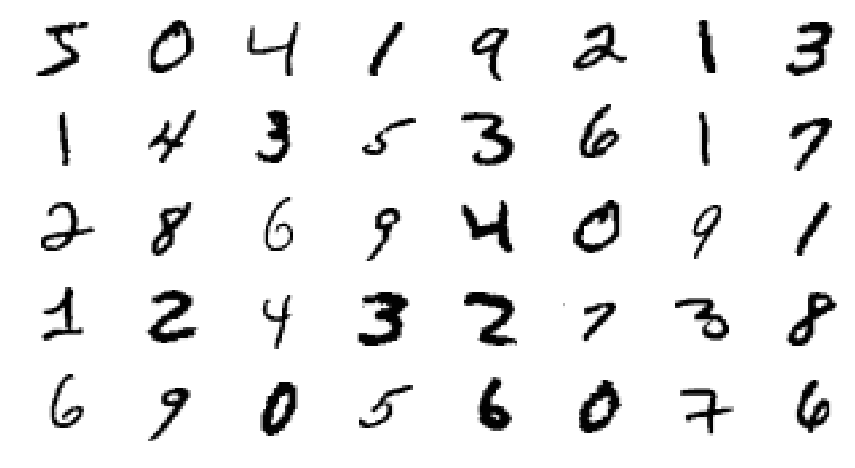

In [3]:
plt.figure(figsize=(15,8))
for i in range(0,40):
    plt.subplot(5, 8, i+1)
    image = 1 - X_train[i]
    image = np.reshape(image, [img_rows, img_cols])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
from gan import MnistGanModel

In [7]:
gan_model = MnistGanModel()
gan_model.init_model()

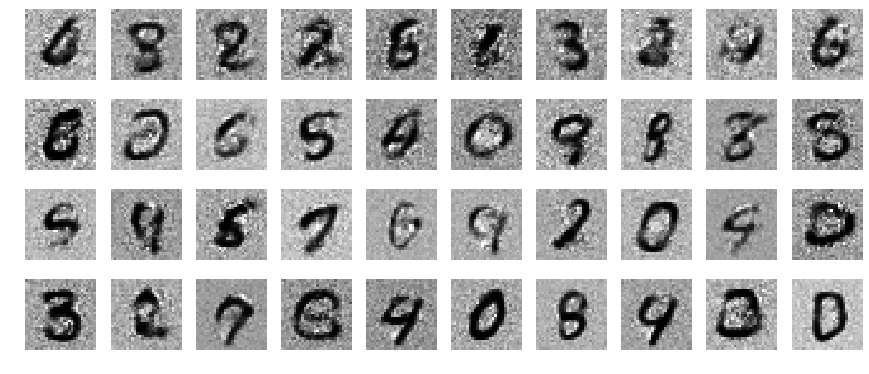

In [8]:
plt.figure(figsize=(15,8))
for i in tqdm(range(4)):
    gan_model.fit(X_train, y_train, epochs=5000, batch_size=128)
    X_gen = gan_model.generate(10)
    for j in range(10):
        plt.subplot(5, 10, 10 * i + j + 1)
        image = 1 - X_gen[j]
        image = np.reshape(image, [img_rows, img_cols])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
plt.show()

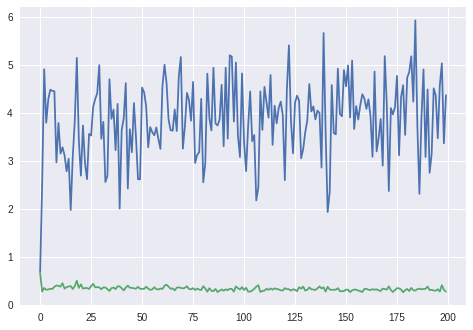

In [11]:
plt.plot(gan_model.generator_losses[::100])
plt.plot(gan_model.discriminator_losses[::100])
plt.show()

In [13]:
multi_gan = {}
for i in range(10):
    gan_model_i = MnistGanModel()
    gan_model_i.init_model()
    multi_gan[i] = gan_model_i

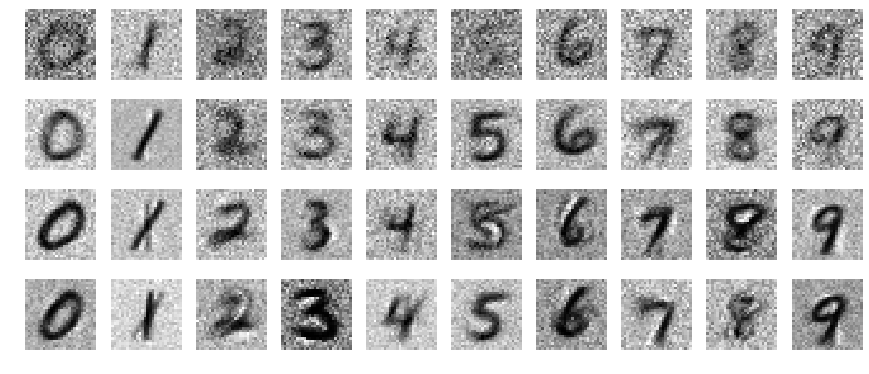

In [14]:
plt.figure(figsize=(15,8))
for i in tqdm(range(0,4)):
    for j in range(10):
        multi_gan[j].fit(X_train[y_train == j], y_train, epochs=100, batch_size=128)
        plt.subplot(5, 10, i * 10 + j + 1)
        image = 1 - multi_gan[j].generate(1)[0]
        image = np.reshape(image, [img_rows, img_cols])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
plt.show()

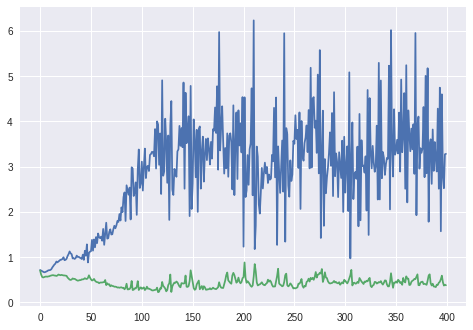

In [16]:
plt.plot(multi_gan[0].generator_losses[::1])
plt.plot(multi_gan[0].discriminator_losses[::1])
plt.show()